Importing and File Location

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


#creating Paths
path= r'C:\Users\wjzak\Dropbox\Career Foundry\Data Immersion\Module 4- Python Fundamentals for Data Analysts\07-2025 Instacart Basket Analysis'

#using the path to pull prepared data
full_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

In [2]:
full_merge.shape

(32404859, 33)

Crosstabs Exercise

In [3]:
#Cross tabulation code- creating crosstab df
#this will pull the variable fro days since prior order by the order number
crosstab = pd.crosstab(full_merge['days_since_prior_order'], full_merge['order_number'], dropna = False)

KeyboardInterrupt: 

In [ ]:
#copies this info to export to excel via paste
crosstab.to_clipboard()

Task 4.10- Part 1- Start

2) Security Implications:
   The data provided here includes both first and last names of customers with additional personal identifier information in the form of state and age. This with martial status provides too much sensitive information on a specific individual. The customer data should be kept confidential and the names are really not necessary beyond data consistency checks, if at all. The security implications of these personal identifiers should be taken into consideration and the information should be kept on a secure platform with the names included. The public facing data does not lose value by removing the first/last names. 

In [4]:
#mapping regions
map_region = {
    #Northeast
    'Maine': 'Northeast',
    'New Hampshire': 'Northeast',
    'Vermont': 'Northeast',
    'Massachusetts': 'Northeast',
    'Rhode Island': 'Northeast',
    'Connecticut': 'Northeast',
    'New York': 'Northeast',
    'Pennsylvania': 'Northeast',
    'New Jersey': 'Northeast',

    #Midwest
    'Wisconsin': 'Midwest',
    'Michigan': 'Midwest',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Ohio': 'Midwest',
    'North Dakota': 'Midwest',
    'South Dakota': 'Midwest',
    'Nebraska': 'Midwest',
    'Kansas': 'Midwest',
    'Minnesota': 'Midwest',
    'Iowa': 'Midwest',
    'Missouri': 'Midwest',

    #South
    'Delaware': 'South',
    'Maryland': 'South',
    'District of Columbia': 'South',
    'Virginia': 'South',
    'West Virginia': 'South',
    'North Carolina': 'South',
    'South Carolina': 'South',
    'Georgia': 'South',
    'Florida': 'South',
    'Kentucky': 'South',
    'Tennessee': 'South',
    'Mississippi': 'South',
    'Alabama': 'South',
    'Oklahoma': 'South',
    'Texas': 'South',
    'Arkansas': 'South',
    'Louisiana': 'South',

    #West
    'Idaho': 'West',
    'Montana': 'West',
    'Wyoming': 'West',
    'Nevada': 'West',
    'Utah': 'West',
    'Colorado': 'West',
    'Arizona': 'West',
    'New Mexico': 'West',
    'Alaska': 'West',
    'Washington': 'West',
    'Oregon': 'West',
    'California': 'West',
    'Hawaii': 'West'
}

In [5]:
#create column for region in the df
full_merge['Region'] = full_merge['State'].map(map_region)

In [6]:
#check results of the region
full_merge['Region'].value_counts()

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [ ]:
#Cross tabulation code between region and spender flag
crosstab = pd.crosstab(full_merge['Region'], full_merge['spender_flag'], dropna = False)

In [ ]:
#copies this info to export to excel via paste
crosstab.to_clipboard()

There is no difference in spending habits across all 4 regions. 2% of the spenders are high spenders in each region.

Creates a variable for low-activity customers and exports a sample of regular customers

In [7]:
#creating exclusion flag using low order customers
full_merge.loc[full_merge['order_number'] < 5, 'exclusion_flag'] = 'Low-Activity Customer'

In [8]:
#creating exclusion flag using low order customers
full_merge.loc[full_merge['order_number'] >= 5, 'exclusion_flag'] = 'Regular Customer'

In [9]:
#check on those who are regular v low activity customers
full_merge['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Regular Customer         24414877
Low-Activity Customer     7989982
Name: count, dtype: int64

In [ ]:
#createa df of just these regular customers
exclusion_sample = full_merge[full_merge['exclusion_flag'] == 'Regular Customer']

In [ ]:
# Export the df for regular customers only
exclusion_sample.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'exclusion_sample.pkl'))

Creating customer profiles for Marketing Strat Team

In [10]:
#create a life_stage category
full_merge.loc[(full_merge['Age'] <= 30) & (full_merge['Number of Dependents'] == 0), 'Life_Stage'] = 'Young Adult'
full_merge.loc[(full_merge['Age'] > 30) & (full_merge['Age'] < 65) & (full_merge['Number of Dependents'] == 0), 'Life_Stage'] = 'Adult'
full_merge.loc[(full_merge['Age'] >= 65), 'Life_Stage'] = 'Senior'
full_merge.loc[(full_merge['Age'] <= 30) & (full_merge['Number of Dependents'] >= 1), 'Life_Stage'] = 'Young Parent'
full_merge.loc[(full_merge['Age'] > 30) & (full_merge['Age'] < 65) & (full_merge['Number of Dependents'] >= 1), 'Life_Stage'] = 'Parent'

In [11]:
#create a income_type category
full_merge.loc[full_merge['Income'] < 50000, 'Income_Type'] = 'Low Income'
full_merge.loc[(full_merge['Income'] >= 50000) & (full_merge['Income'] < 100000), 'Income_Type'] = 'Average Income'
full_merge.loc[full_merge['Income'] >= 100000, 'Income_Type'] = 'High Income'

In [12]:
#create a product preference 
full_merge.loc[full_merge['department_id'].isin([4, 12, 16]), 'Product_Preference'] = 'Whole Foods'
full_merge.loc[full_merge['department_id'].isin([1, 3, 20, 12]), 'Product_Preference'] = 'Convenience Foods'
full_merge.loc[~full_merge['department_id'].isin([4, 12, 16, 1, 3, 20]), 'Product_Preference'] = 'Mixed Basket'

In [13]:
#print a count of the new columns made
full_merge[['Life_Stage']].value_counts()

Life_Stage  
Parent          12897286
Senior           8575084
Young Parent     4955070
Adult            4333130
Young Adult      1644289
Name: count, dtype: int64

In [14]:
#print a count of the new columns made
full_merge[['Income_Type']].value_counts()

Income_Type   
High Income       14814766
Average Income    13996010
Low Income         3594083
Name: count, dtype: int64

In [15]:
#print a count of the new columns made
full_merge[['Product_Preference']].value_counts()

Product_Preference
Whole Foods           14878038
Mixed Basket          12359474
Convenience Foods      5167347
Name: count, dtype: int64

NOTE: The code below would not work with my PC but I think it would've done something similar to what I put above it. I kept running into memory errors/crashes when merging the data.

#create profile based on age, dependents, income, time of shopping, and product types
def customer_prof(row):
    if row['Age'] < 65  and row['Number of Dependents']  == 0:
        life_stage = 'Single Adult'
    elif row['Age'] < 40 and row['Number of Dependents'] >= 1:
        life_stage = 'Young Parent'
    elif row['Age'] >= 40 and row['Number of Dependents'] >= 1:
        life_stage = 'Parent'
    elif row['Age'] >= 65 and row['Number of Dependents']  == 0:
        life_stage = 'Senior Adult'
    else:
        life_stage = 'Other'
        
    if row['Income'] < 40000:
        income = 'Budget-Conscious'
    elif row['Income'] < 90000:
        income = 'Regular Shopper'
    else:
        income = 'Wealthy'
    
    if row['department_id'] in [4, 12, 16]:
        products = 'Fresh Foods'
    elif row['department_id'] in [1, 3, 20, 12]:
        products = 'Convenience Foods'
    else:
        products = 'Mixed Basket'

        return pd.Series([life_stage, income, products])

#test print different lines just change the # here
print(customer_prof(full_merge.loc[0])) 

#apply the different columns to the main table
full_merge[['Life_Stage', 'Income_Type', 'Product_Preference']] = full_merge.apply(customer_prof, axis=1)

Create a Visualization for the Marketing Strat Team

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Parent'),
  Text(1, 0, 'Senior'),
  Text(2, 0, 'Young Parent'),
  Text(3, 0, 'Adult'),
  Text(4, 0, 'Young Adult')])

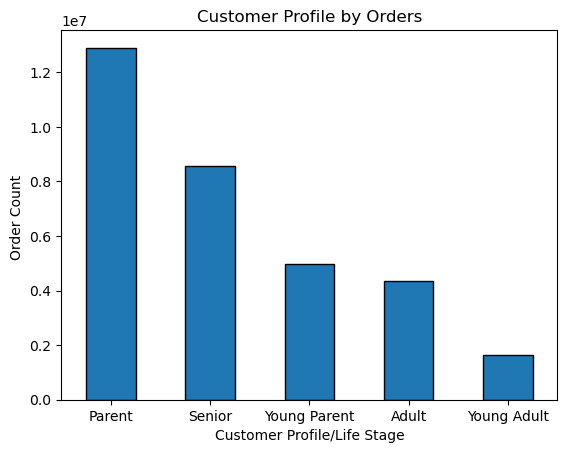

In [113]:
#create histogram with life stage profiles
life_stage_bar = full_merge['Life_Stage'].value_counts().plot.bar(edgecolor='black')
plt.title("Customer Profile by Orders")
plt.ylabel("Order Count ")
plt.xlabel("Customer Profile/Life Stage")
plt.xticks(rotation=0)  

In [114]:
#this comand saves the figure listed
life_stage_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'life_stage_bar.png'))

In [215]:
#print column names to use in aggregating below
full_merge.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_label', 'busiest_day',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_prices',
       'spender_flag', 'median_day', 'frequency_flag', 'First Name',
       'Last Name', 'Gender', 'State', 'Age', 'Date Joined',
       'Number of Dependents', 'Martial Status', 'Income', 'Region',
       'exclusion_flag', 'Life_Stage', 'Income_Type', 'Product_Preference',
       'department', 'dept_group'],
      dtype='object')

In [216]:
#summary statistics for customer profiles and expenditure
full_merge.groupby('Life_Stage').agg({'avg_prices': ['mean', 'min', 'max']})

avg_prices                   
                   mean  min           max
Life_Stage                                
Adult         12.130755  1.0  25005.425000
Parent        12.029547  1.0  12506.925000
Senior        11.768850  1.0  14042.512281
Young Adult   12.414159  1.0   8794.882427
Young Parent  11.942018  1.1  10209.987755

In [217]:
#summary statistics for customer profiles and number of orders
full_merge.groupby('Life_Stage').agg({'order_number': ['mean', 'min', 'max']})

order_number           
                     mean  min   max
Life_Stage                          
Adult           17.458597  1.0  99.0
Parent          17.116955  1.0  99.0
Senior          17.098243  1.0  99.0
Young Adult     16.945336  1.0  99.0
Young Parent    17.073306  1.0  99.0

In [61]:
#Cross tabulation between customer profiles and regions
crosstab = pd.crosstab(full_merge['Life_Stage'], full_merge['Region'], dropna = False)

In [219]:
print(crosstab)

Region        Midwest  Northeast    South     West
Life_Stage                                        
Adult         1041076     725007  1445003  1122044
Parent        3035114    2282185  4283764  3296223
Senior        1990844    1553903  2836257  2194080
Young Adult    371362     297447   565601   409879
Young Parent  1158929     864194  1661260  1270687


There aren't many notable trends for these customer profiles given they are largely age/dependent based. The northeast looks to be the smallest group which is a bit surprising given the large

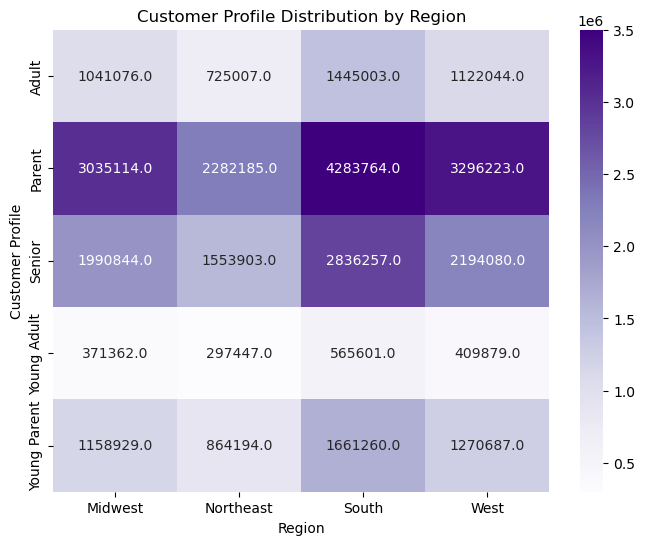

In [63]:
#create a heatmap for the Life Stages and Regional data
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, fmt=".1f", cmap="Purples", vmin=300000, vmax=3500000) #changed the distrbution here to make it more clear
plt.title("Customer Profile Distribution by Region")
plt.ylabel("Customer Profile")
plt.xlabel("Region")

#saves the figure to the visualization folder
plt.savefig('C:/Users/wjzak/Dropbox/Career Foundry/Data Immersion/Module 4- Python Fundamentals for Data Analysts/07-2025 Instacart Basket Analysis/04 Analysis/Visualizations/heatmap_region.png')

In [38]:
#create a match variable for departments
dept_match = {
    1: "frozen",
    2: "other",
    3: "bakery",
    4: "produce",
    5: "alcohol",
    6: "international",
    7: "beverages",
    8: "pets",
    9: "dry goods pasta",
    10: "bulk",
    11: "personal care",
    12: "meat seafood",
    13: "pantry",
    14: "breakfast",
    15: "canned goods",
    16: "dairy eggs",
    17: "household",
    18: "babies",
    19: "snacks",
    20: "deli",
    21: "missing"
}

In [39]:
#add a new column for department_id to department name
full_merge["department"] = full_merge["department_id"].map(dept_match)

In [40]:
#Cross tabulation between customer profiles and Department
crosstab2 = pd.crosstab(full_merge['Life_Stage'], full_merge['department'], dropna = False)

In [41]:
print(crosstab2)

department    alcohol  babies  bakery  beverages  breakfast   bulk  \
Life_Stage                                                           
Adult           21826   56733  158951     361304      94487   4388   
Parent          60439  170653  465576    1069106     280449  13777   
Senior          39036  109445  309522     714832     183844   9242   
Young Adult      7528   23080   59433     136711      35388   1726   
Young Parent    24867   63891  178946     406170     108865   5440   

department    canned goods  dairy eggs    deli  dry goods pasta  ...  \
Life_Stage                                                       ...   
Adult               141780      723306  143431           114232  ...   
Parent              423913     2147831  416802           345053  ...   
Senior              282438     1426213  277618           228935  ...   
Young Adult          54390      272307   53214            44727  ...   
Young Parent        165537      829090  160184           133680  ...   

depa

There are a few interesting findings here just looking at the cross tabulation. Parents are more likely to have pets and buy pet products compared to the other customer categories.
Parents, Seniors and Young parents are the most likely to pruchase baby products. 

In [42]:
#viewing department counts as reference
full_merge['department'].value_counts()

department
produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: count, dtype: int64

In [43]:
#create department groups
dept_group_map = {
    #Fresh Foods
    "produce": "Fresh Foods",
    "meat seafood": "Fresh Foods",
    "deli": "Fresh Foods",
    "bakery": "Fresh Foods",
    "dairy eggs": "Fresh Foods",

    #Pantry & Packaged
    "pantry": "Pantry & Packaged",
    "canned goods": "Pantry & Packaged",
    "dry goods pasta": "Pantry & Packaged",
    "breakfast": "Pantry & Packaged",
    "snacks": "Pantry & Packaged",
    "beverages": "Pantry & Packaged",
    "international": "Pantry & Packaged",
    "alcohol": "Pantry & Packaged",

    #Household & Non-Food
    "household": "Household & Non-Food",
    "personal care": "Household & Non-Food",
    "babies": "Household & Non-Food",
    "pets": "Household & Non-Food",
}


In [44]:
#attach department group column to data
full_merge["dept_group"] = full_merge["department"].map(dept_group_map)

In [45]:
#viewing department groups counts as reference
full_merge['dept_group'].value_counts()

dept_group
Fresh Foods             17810642
Pantry & Packaged       10511709
Household & Non-Food     1707756
Name: count, dtype: int64

In [229]:
#Cross tabulation between customer profiles and Department
crosstab3 = pd.crosstab(full_merge['Life_Stage'], full_merge['dept_group'], dropna = False)

In [230]:
print(crosstab3)

dept_group    Fresh Foods  Household & Non-Food  Pantry & Packaged     NaN
Life_Stage                                                                
Adult             2387064                224268            1405104  316694
Parent            7084286                684808            4184547  943645
Senior            4717230                450071            2777353  630430
Young Adult        903526                 88400             534449  117914
Young Parent      2718536                260209            1610256  366069


In [65]:
#Cross tabulation between customer profiles and Department
crosstab4 = pd.crosstab(full_merge['Life_Stage'], full_merge['price_label'], dropna = False)

In [66]:
print(crosstab4)

price_label   High-range product  Low-range product  Mid-range product
Life_Stage                                                            
Adult                      53924            1352515            2926691
Parent                    167007            4029216            8701063
Senior                    111950            2678156            5784978
Young Adult                20621             516672            1106996
Young Parent               64176            1549762            3341132


In [68]:
#variable to help with bar graph below
pricelabel_counts = full_merge.groupby(["price_label", "Life_Stage"]).size().reset_index(name="count")

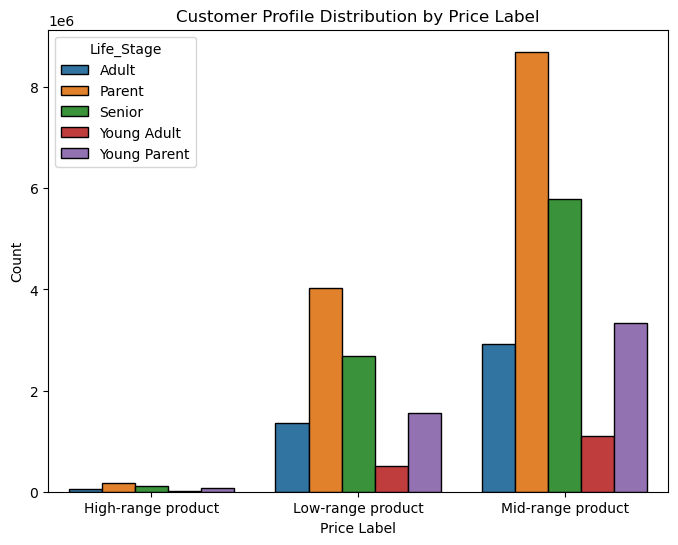

In [69]:
#creating a bar graph shows how price label is different across customers
plt.figure(figsize=(8, 6))
sns.barplot(data=pricelabel_counts,x="price_label", y="count", hue="Life_Stage",edgecolor='black')
plt.title("Customer Profile Distribution by Price Label")
plt.ylabel("Count") 
plt.xlabel("Price Label")
#saves the figure to the visualization folder
plt.savefig('C:/Users/wjzak/Dropbox/Career Foundry/Data Immersion/Module 4- Python Fundamentals for Data Analysts/07-2025 Instacart Basket Analysis/04 Analysis/Visualizations/customer_by_price_labelpng')

In [231]:
#creating % cross tabulation to further understand trends across department groups
ct = pd.crosstab(
    full_merge["Life_Stage"], 
    full_merge["dept_group"], 
    normalize="columns" 
) * 100 

print(ct.round(2))

dept_group    Fresh Foods  Household & Non-Food  Pantry & Packaged
Life_Stage                                                        
Adult               13.40                 13.13              13.37
Parent              39.78                 40.10              39.81
Senior              26.49                 26.35              26.42
Young Adult          5.07                  5.18               5.08
Young Parent        15.26                 15.24              15.32


In [97]:
#variable to help with bar graph below- only used department here, ran into a few other versions that didnt make sense.
department_spend = full_merge.groupby(["department", "Life_Stage"]).size().reset_index(name="count")

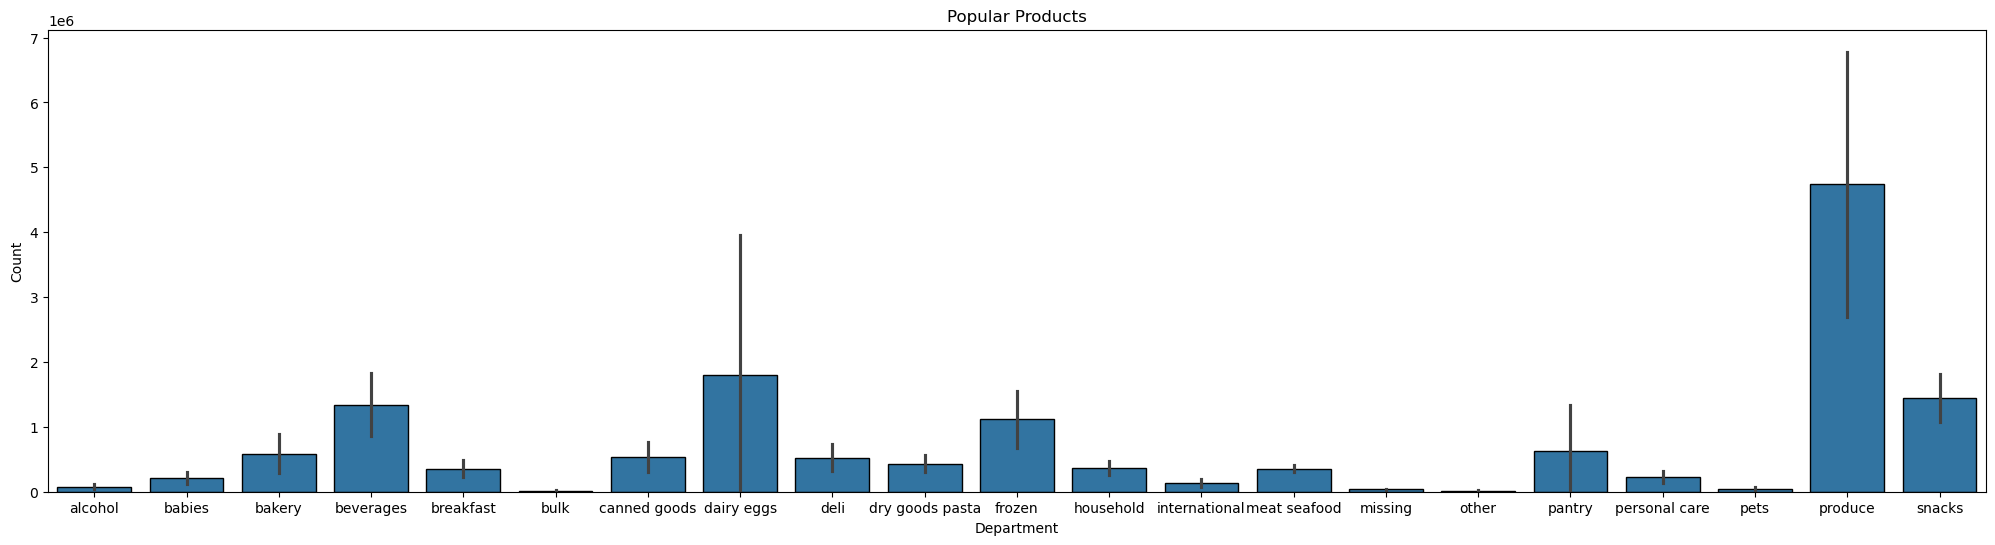

In [89]:
#creating a bar graph to show how popular each department is
plt.figure(figsize=(25, 6))
sns.barplot(data=department_spend,x="department", y="count", edgecolor='black')
plt.title("Popular Products")
plt.ylabel("Count") 
plt.xlabel("Department")

#saves the figure to the visualization folder
plt.savefig('C:/Users/wjzak/Dropbox/Career Foundry/Data Immersion/Module 4- Python Fundamentals for Data Analysts/07-2025 Instacart Basket Analysis/04 Analysis/Visualizations/spend_by_department.png')

In [99]:
top_depts = (
    department_spend.groupby("department")["count"].sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

In [100]:
popular_data = department_spend[department_spend["department"].isin(top_depts)]

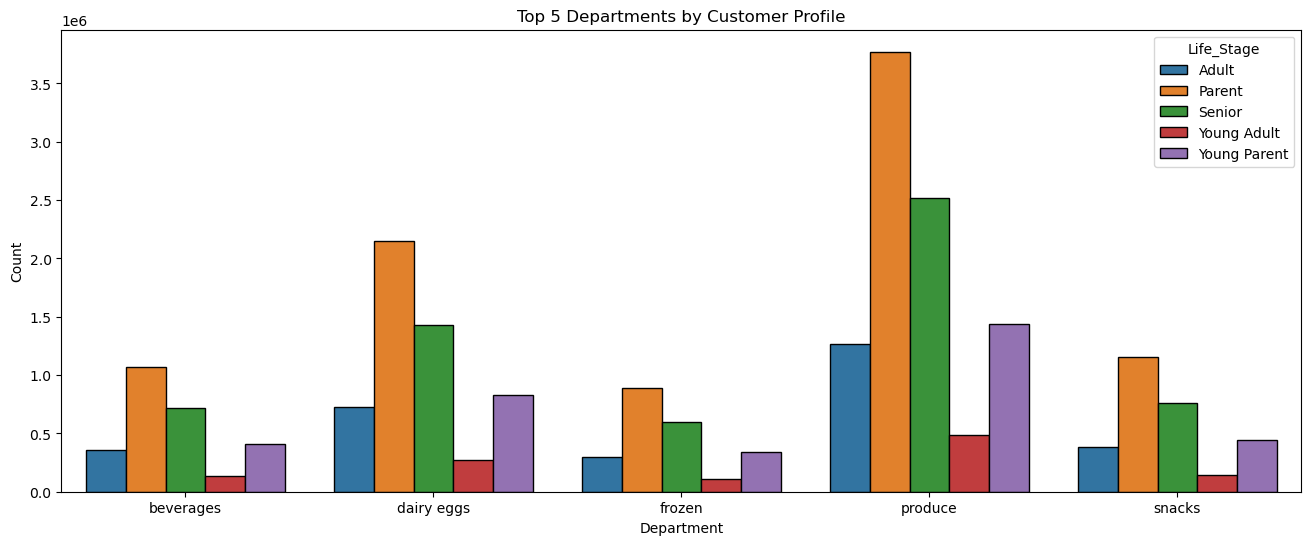

In [101]:
#creating a bar graph to show how popular each department is
plt.figure(figsize=(16, 6))
sns.barplot(data=popular_data,x="department", y="count", hue="Life_Stage",edgecolor='black')
plt.title("Top 5 Departments by Customer Profile")
plt.ylabel("Count") 
plt.xlabel("Department")

#saves the figure to the visualization folder
plt.savefig('C:/Users/wjzak/Dropbox/Career Foundry/Data Immersion/Module 4- Python Fundamentals for Data Analysts/07-2025 Instacart Basket Analysis/04 Analysis/Visualizations/spend_by_popular_department.png')

In [56]:
#variable to help with bar graph below
profile_counts = full_merge.groupby(["Region", "Life_Stage"]).size().reset_index(name="count")

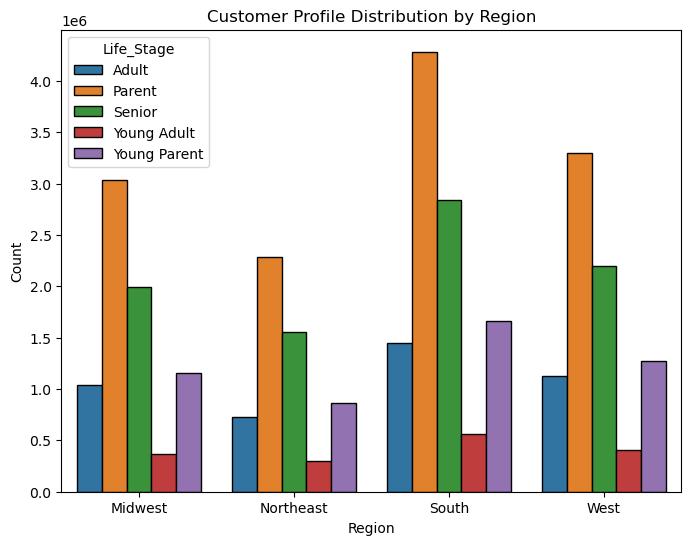

In [67]:
#creating a bar grpah that is split among regions to show the different life stages
plt.figure(figsize=(8, 6))
sns.barplot(data=profile_counts,x="Region", y="count", hue="Life_Stage",edgecolor='black')
plt.title("Customer Profile Distribution by Region")
plt.ylabel("Count") 
plt.xlabel("Region")
#saves the figure to the visualization folder
plt.savefig('C:/Users/wjzak/Dropbox/Career Foundry/Data Immersion/Module 4- Python Fundamentals for Data Analysts/07-2025 Instacart Basket Analysis/04 Analysis/Visualizations/customer_by_region.png')

In [102]:
#variable to help with bar graph below
loyal_region_spend = full_merge.groupby(["Region", "loyalty_flag"]).agg(avg_price=("prices", "mean"))

C:\Users\wjzak\AppData\Local\Temp\ipykernel_17828\401610654.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=loyal_region_spend,x="Region", y="avg_price", edgecolor='black', palette=colors, ci=None)
C:\Users\wjzak\AppData\Local\Temp\ipykernel_17828\401610654.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loyal_region_spend,x="Region", y="avg_price", edgecolor='black', palette=colors, ci=None)


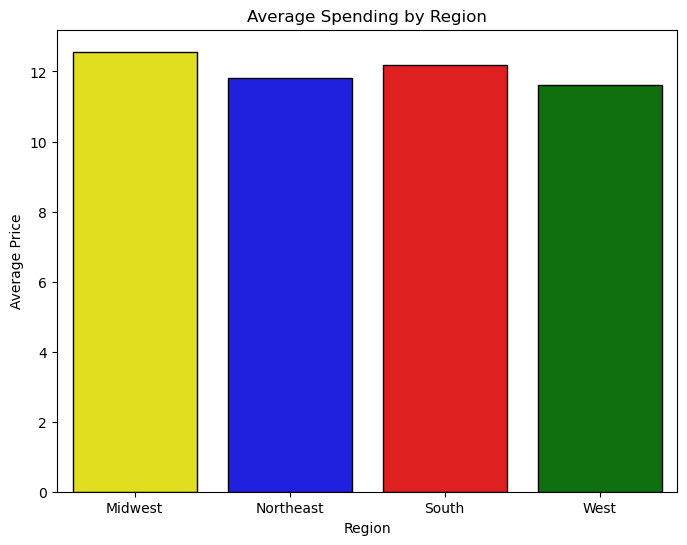

In [146]:
#creating a bar grpah that is split among loyalty status and region
plt.figure(figsize=(8, 6))
colors = ['yellow', 'blue', 'red', 'green']
sns.barplot(data=loyal_region_spend,x="Region", y="avg_price", edgecolor='black', palette=colors, ci=None)
plt.title("Average Spending by Region")
plt.ylabel("Average Price") 
plt.xlabel("Region")
#saves the figure to the visualization folder
plt.savefig('C:/Users/wjzak/Dropbox/Career Foundry/Data Immersion/Module 4- Python Fundamentals for Data Analysts/07-2025 Instacart Basket Analysis/04 Analysis/Visualizations/loyalty_by_region.png')

In [147]:
#variable to help with bar graph below
region_spend = full_merge.groupby(["Region", "loyalty_flag"]).size().reset_index(name="count")

C:\Users\wjzak\AppData\Local\Temp\ipykernel_17828\3390068141.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=region_spend,x="Region", y="count", edgecolor='black', palette=colors, ci=None)
C:\Users\wjzak\AppData\Local\Temp\ipykernel_17828\3390068141.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_spend,x="Region", y="count", edgecolor='black', palette=colors, ci=None)


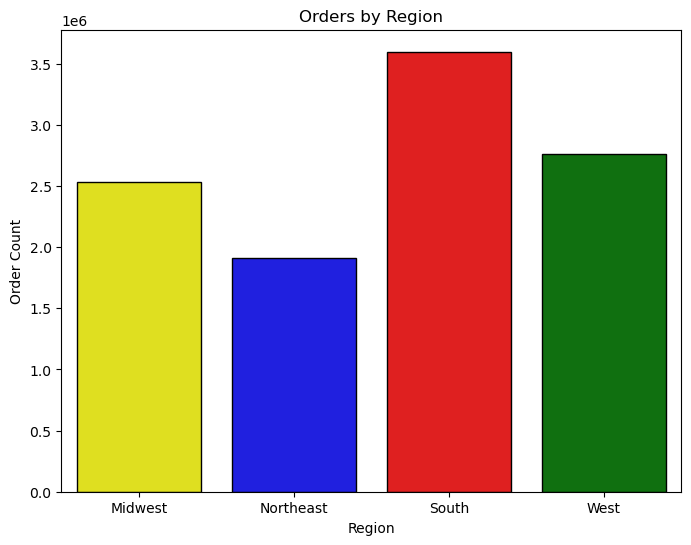

In [148]:
#creating a bar grpah that is split among loyalty status and region
plt.figure(figsize=(8, 6))
colors = ['yellow', 'blue', 'red', 'green']
sns.barplot(data=region_spend,x="Region", y="count", edgecolor='black', palette=colors, ci=None)
plt.title("Orders by Region")
plt.ylabel("Order Count") 
plt.xlabel("Region")
#saves the figure to the visualization folder
plt.savefig('C:/Users/wjzak/Dropbox/Career Foundry/Data Immersion/Module 4- Python Fundamentals for Data Analysts/07-2025 Instacart Basket Analysis/04 Analysis/Visualizations/count_by_region.png')

In [46]:
#variable to help with bar graph below
profile_counts2 = full_merge.groupby(["dept_group", "Life_Stage"]).size().reset_index(name="count")

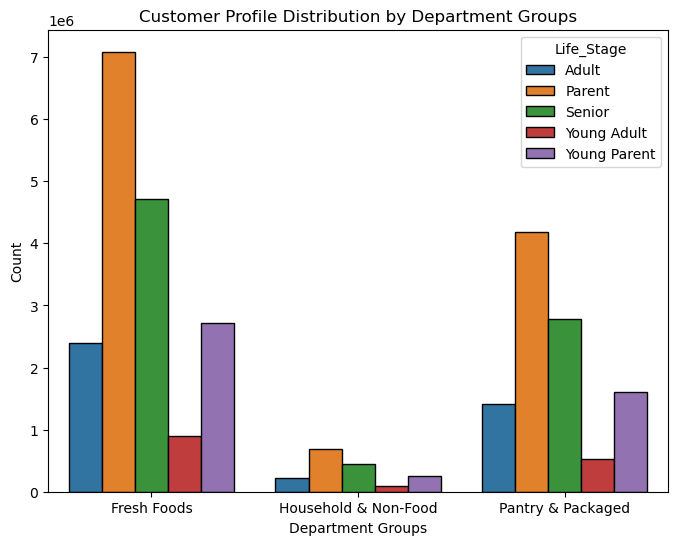

In [58]:
#creating a bar grpah that is split between department food groups and customer profiles
plt.figure(figsize=(8, 6))
sns.barplot(data=profile_counts2,x="dept_group", y="count", hue="Life_Stage", edgecolor='black')
plt.title("Customer Profile Distribution by Department Groups")
plt.ylabel("Count")
plt.xlabel("Department Groups")
#saves the figure to the visualization folder
plt.savefig('C:/Users/wjzak/Dropbox/Career Foundry/Data Immersion/Module 4- Python Fundamentals for Data Analysts/07-2025 Instacart Basket Analysis/04 Analysis/Visualizations/Customer_by_Department.png')

In [118]:
#variable to help with bar graph below
profile_counts3 = full_merge.groupby(["loyalty_flag", "Life_Stage"]).size().reset_index(name="count")

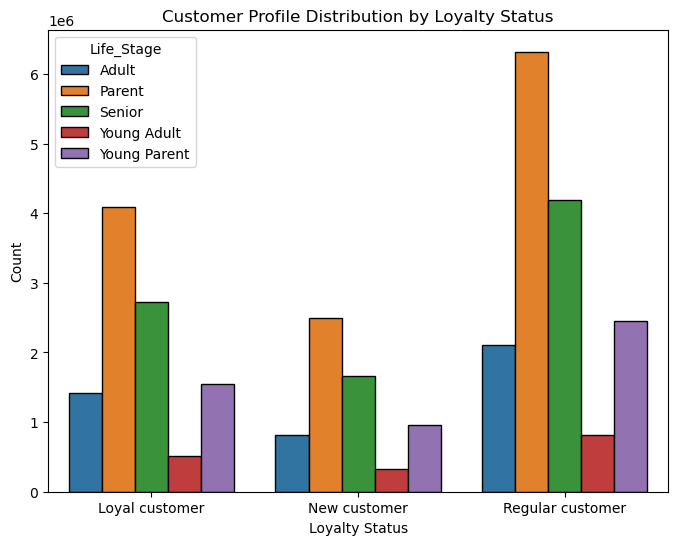

In [119]:
#creating a bar grpah that is split for customer profiles and loyalty status
plt.figure(figsize=(8, 6))
sns.barplot(data=profile_counts3,x="loyalty_flag", y="count", hue="Life_Stage", edgecolor='black')
plt.title("Customer Profile Distribution by Loyalty Status")
plt.ylabel("Count")
plt.xlabel("Loyalty Status")
#saves the figure to the visualization folder
plt.savefig('C:/Users/wjzak/Dropbox/Career Foundry/Data Immersion/Module 4- Python Fundamentals for Data Analysts/07-2025 Instacart Basket Analysis/04 Analysis/Visualizations/Customer_by_Loyalty.png')

In [122]:
#variable to help with bar graph below
profile_counts4 = full_merge.groupby(["frequency_flag", "Life_Stage"]).size().reset_index(name="count")

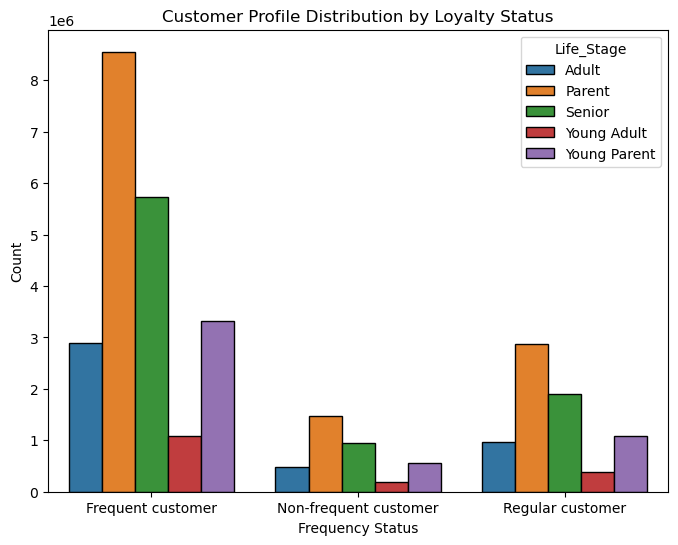

In [123]:
#creating a bar grpah that is split for customer profiles and loyalty status
plt.figure(figsize=(8, 6))
sns.barplot(data=profile_counts4,x="frequency_flag", y="count", hue="Life_Stage", edgecolor='black')
plt.title("Customer Profile Distribution by Loyalty Status")
plt.ylabel("Count")
plt.xlabel("Frequency Status")
#saves the figure to the visualization folder
plt.savefig('C:/Users/wjzak/Dropbox/Career Foundry/Data Immersion/Module 4- Python Fundamentals for Data Analysts/07-2025 Instacart Basket Analysis/04 Analysis/Visualizations/Customer_by_Loyalty.png')

In [120]:
#variable to help with bar graph below
profile_counts5 = full_merge.groupby(["loyalty_flag", "frequency_flag"]).size().reset_index(name="count")

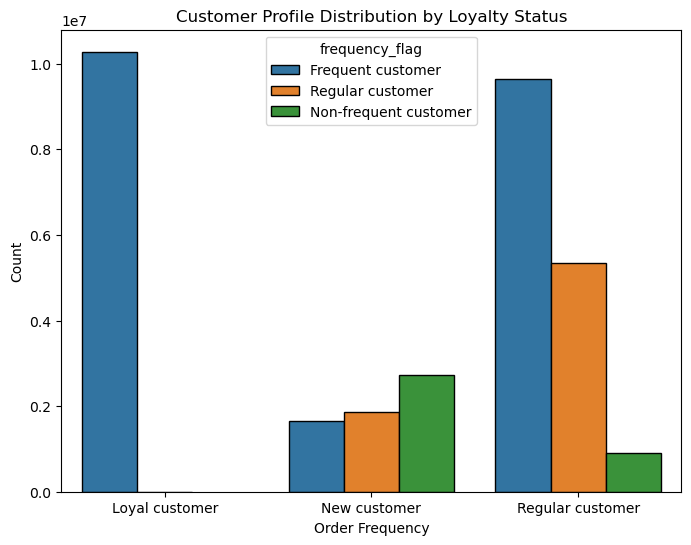

In [121]:
#creating a bar grpah that is split for customer profiles and loyalty status
plt.figure(figsize=(8, 6))
sns.barplot(data=profile_counts5,x="loyalty_flag", y="count", hue="frequency_flag", edgecolor='black')
plt.title("Customer Profile Distribution by Loyalty Status")
plt.ylabel("Count")
plt.xlabel("Order Frequency")
#saves the figure to the visualization folder
plt.savefig('C:/Users/wjzak/Dropbox/Career Foundry/Data Immersion/Module 4- Python Fundamentals for Data Analysts/07-2025 Instacart Basket Analysis/04 Analysis/Visualizations/Frequency_by_Loyalty.png')

In [23]:
#sets a specific seed for reproducing this outcome
np.random.seed(4)
#the lens here is setting the length to the number of rows in the df
#the 0.7 is a logic test set to 70%
dev = np.random.rand(len(full_merge)) <= 0.7

In [17]:
#stores 70% of the df under big
big = full_merge[dev]

In [24]:
#stores 30% of the df under small
small = full_merge[~dev]

In [25]:
#reduces df even further to only days of the week and prices
df_2 = small[['orders_day_of_week','prices']]

([<matplotlib.axis.XTick at 0x16ba6d4ed50>,
 [Text(0, 0, 'Sunday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Friday'),
  Text(6, 0, 'Saturday')])

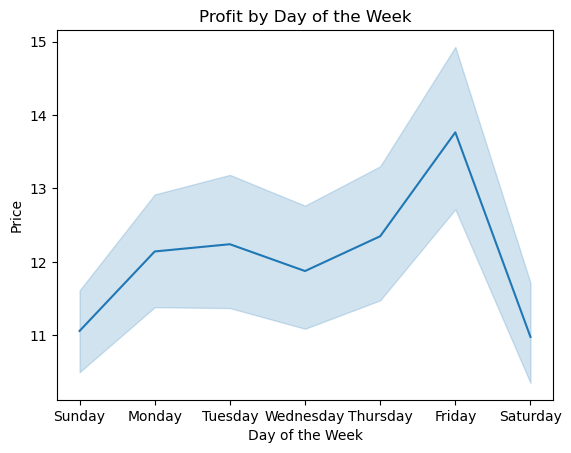

In [26]:
#create a line graph
linedxp = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')
plt.title("Profit by Day of the Week")          
plt.xlabel("Day of the Week")                      
plt.ylabel("Price")   
#this changes the numbers to the days of the week
day_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(ticks=range(7), labels=day_names)

In [27]:
#this comand saves the figure listed above
linedxp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Profitable Day.png'))

In [107]:
#reduces df even further to variables listed below
df_3 = small[['Region','orders_day_of_week','order_hour_of_day','prices']]

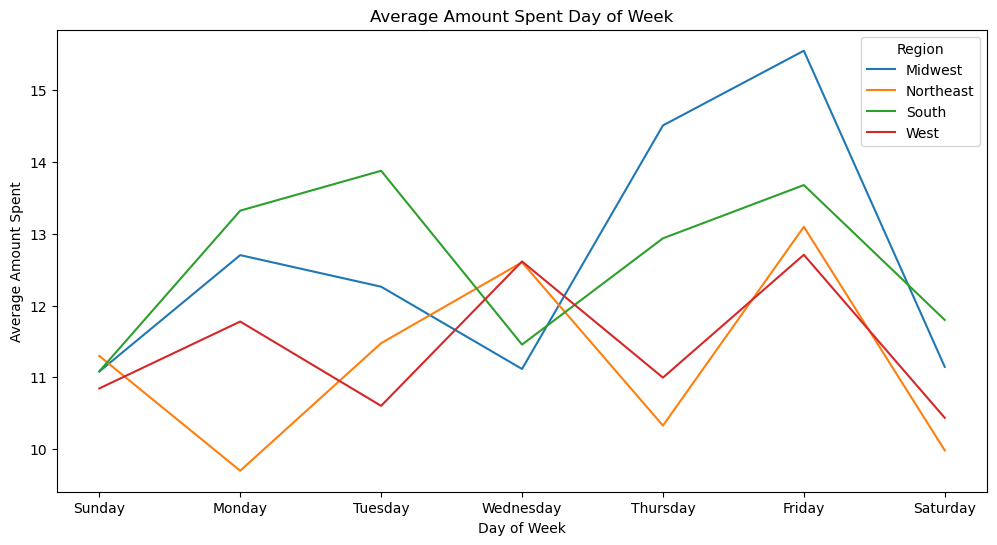

In [110]:
#create a line graph to understand how customer loyalty impacts purchasing
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_3, x='orders_day_of_week', y='prices',hue='Region',estimator='mean', errorbar=None)
plt.title("Average Amount Spent Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Amount Spent")
plt.legend(title='Region')
day_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(ticks=range(7), labels=day_names)

plt.savefig('C:/Users/wjzak/Dropbox/Career Foundry/Data Immersion/Module 4- Python Fundamentals for Data Analysts/07-2025 Instacart Basket Analysis/04 Analysis/Visualizations/region_by_dotw.png')

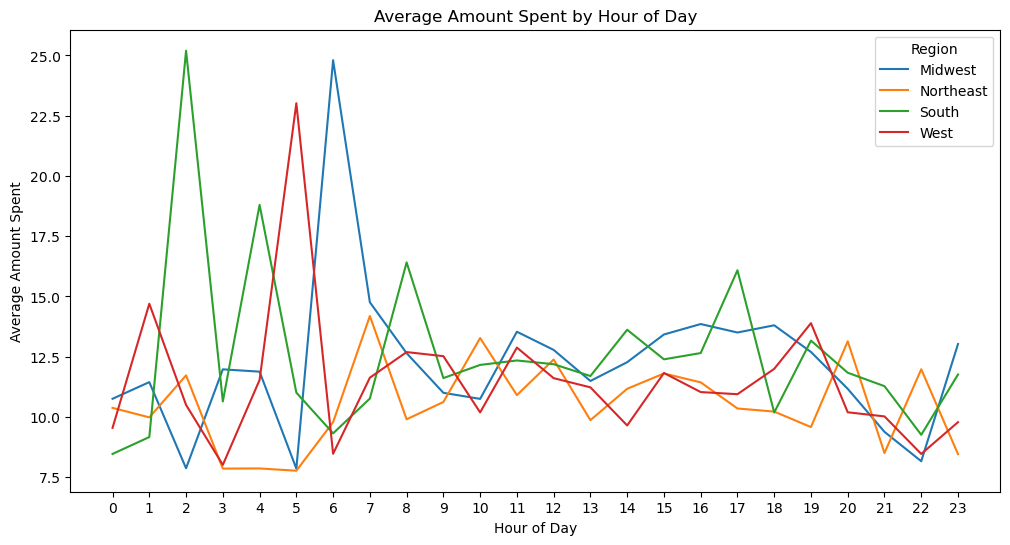

In [111]:
#create a line graph to understand how customer loyalty impacts purchasing
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_3, x='order_hour_of_day', y='prices',hue='Region',estimator='mean', errorbar=None)
plt.title("Average Amount Spent by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Amount Spent")
plt.xticks(range(0, 24))
plt.legend(title='Region')
plt.savefig('C:/Users/wjzak/Dropbox/Career Foundry/Data Immersion/Module 4- Python Fundamentals for Data Analysts/07-2025 Instacart Basket Analysis/04 Analysis/Visualizations/region_by_hour_of_day.png')

In [132]:
#variable to help with line graph below
line_count1 = full_merge.groupby(["loyalty_flag", "orders_day_of_week"]).size().reset_index(name="count")

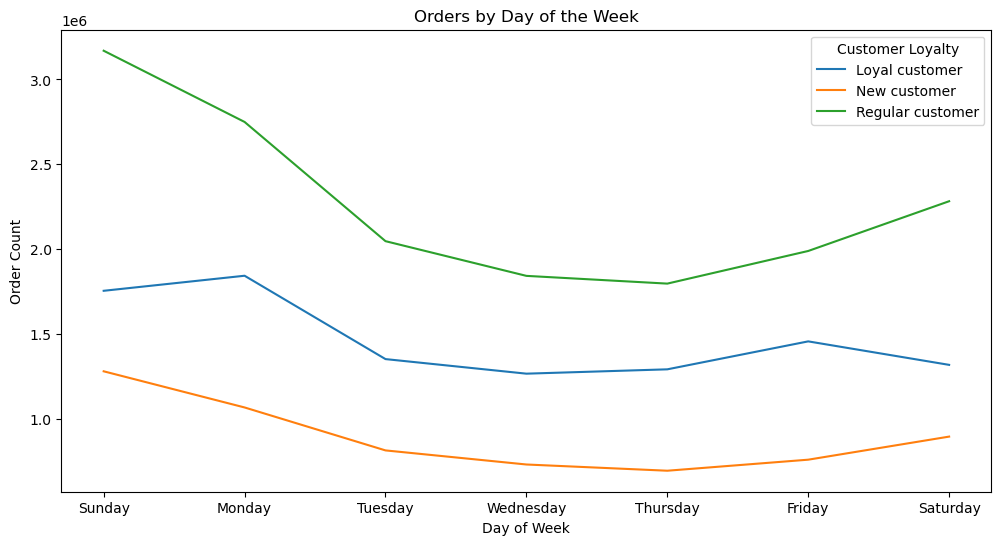

In [133]:
#create a line graph to understand how customer loyalty impacts purchasing
plt.figure(figsize=(12, 6))
sns.lineplot(data=line_count1, x='orders_day_of_week', y='count',hue='loyalty_flag',estimator='count', errorbar=None)
plt.title("Orders by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Order Count")
plt.legend(title='Customer Loyalty')
day_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(ticks=range(7), labels=day_names)

plt.savefig('C:/Users/wjzak/Dropbox/Career Foundry/Data Immersion/Module 4- Python Fundamentals for Data Analysts/07-2025 Instacart Basket Analysis/04 Analysis/Visualizations/Count_Loyalty_by_dotw.png')

In [134]:
#variable to help with line graph below
line_count2 = full_merge.groupby(["loyalty_flag", "order_hour_of_day"]).size().reset_index(name="count")

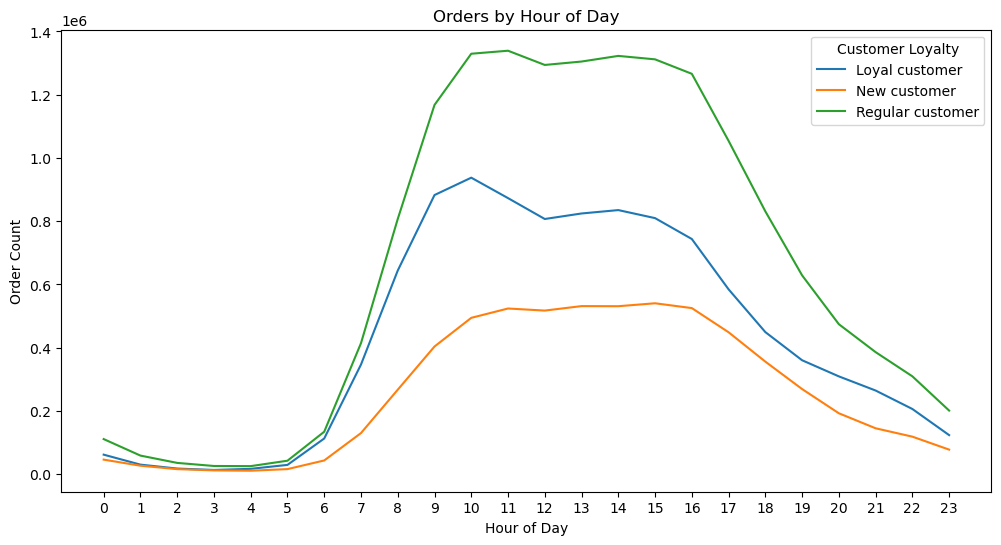

In [135]:
#create a line graph to understand how customer loyalty impacts purchasing
plt.figure(figsize=(12, 6))
sns.lineplot(data=line_count2, x='order_hour_of_day', y='count',hue='loyalty_flag',estimator='count', errorbar=None)
plt.title("Orders by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Order Count")
plt.xticks(range(0, 24))
plt.legend(title='Customer Loyalty')
plt.savefig('C:/Users/wjzak/Dropbox/Career Foundry/Data Immersion/Module 4- Python Fundamentals for Data Analysts/07-2025 Instacart Basket Analysis/04 Analysis/Visualizations/Count_Loyalty_by_hour_of_day.png')

In [136]:
#variable to help with line graph below
line_count3 = full_merge.groupby(["Region", "orders_day_of_week"]).size().reset_index(name="count")

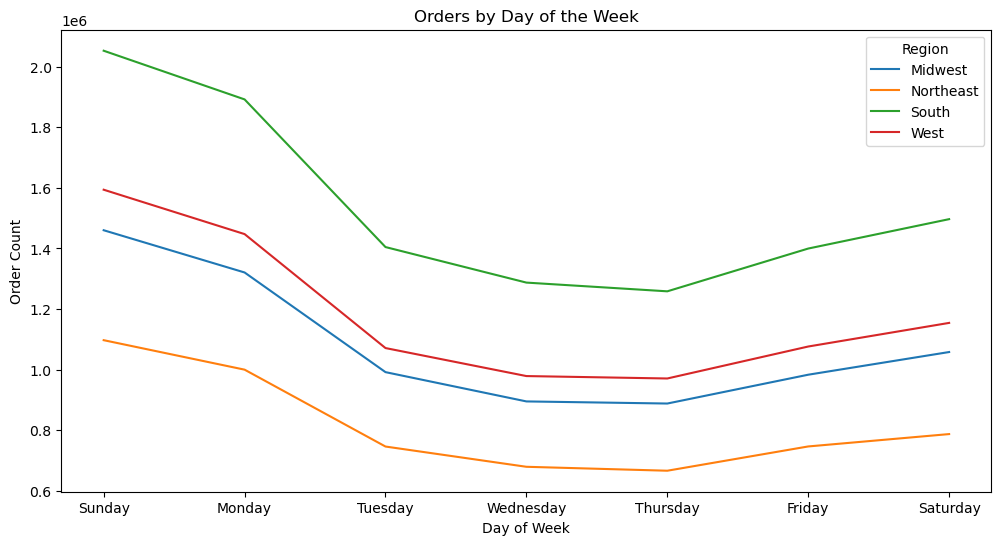

In [137]:
#create a line graph to understand how customer loyalty impacts purchasing
plt.figure(figsize=(12, 6))
sns.lineplot(data=line_count3, x='orders_day_of_week', y='count',hue='Region',estimator='count', errorbar=None)
plt.title("Orders by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Order Count")
plt.legend(title='Region')
day_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(ticks=range(7), labels=day_names)

plt.savefig('C:/Users/wjzak/Dropbox/Career Foundry/Data Immersion/Module 4- Python Fundamentals for Data Analysts/07-2025 Instacart Basket Analysis/04 Analysis/Visualizations/Count_Region_by_dotw.png')

In [138]:
#variable to help with line graph below
line_count4 = full_merge.groupby(["Region", "order_hour_of_day"]).size().reset_index(name="count")

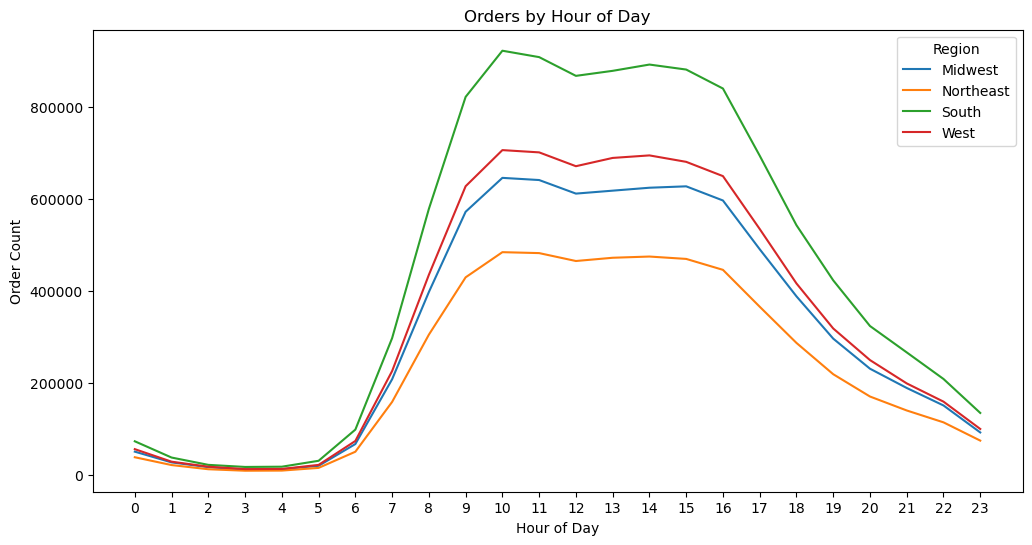

In [139]:
#create a line graph to understand how customer loyalty impacts purchasing
plt.figure(figsize=(12, 6))
sns.lineplot(data=line_count4, x='order_hour_of_day', y='count',hue='Region',estimator='count', errorbar=None)
plt.title("Orders by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Order Count")
plt.xticks(range(0, 24))
plt.legend(title='Region')
plt.savefig('C:/Users/wjzak/Dropbox/Career Foundry/Data Immersion/Module 4- Python Fundamentals for Data Analysts/07-2025 Instacart Basket Analysis/04 Analysis/Visualizations/Count_Region_by_hour_of_day.png')

In [241]:
# Export final data to pkl
full_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'full_merge_final.pkl'))